# LFW Dataset Insights


In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

## Number of images per subject

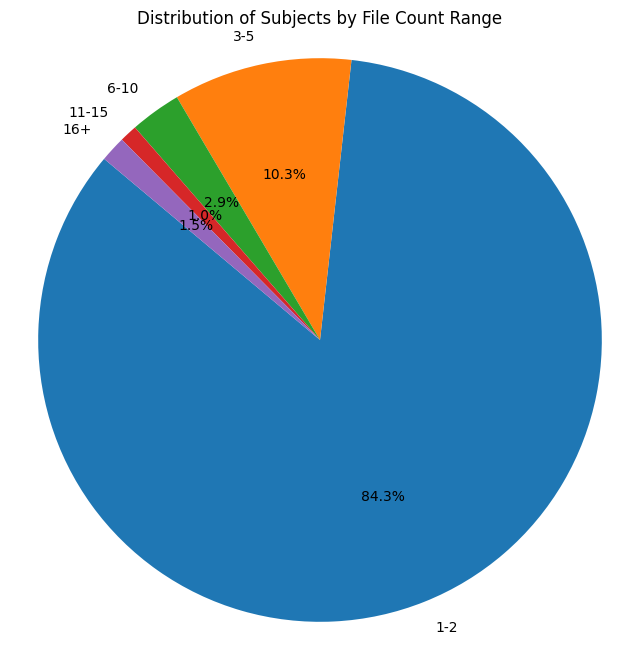

In [2]:
lfw_path = 'lfw'
subdir_file_counts = {}

# Create a dict with keys of subdir names and values of number of files inside it
for root, _, files in os.walk(lfw_path):
    subdir = os.path.relpath(root, lfw_path)
    if subdir != '.':
        subdir_file_counts[subdir] = len(files)

# Calculate the number of occurrences for each file count range
file_count_ranges = {
    '1-2': 0,
    '3-5': 0,
    '6-10': 0,
    '11-15': 0,
    '16+':0
}

# Loop over the dict values to classify them into ranges
for count in subdir_file_counts.values():
    if count <= 2:
        file_count_ranges['1-2'] += 1
    elif count <=5:
        file_count_ranges['3-5'] += 1
    elif count <= 10:
        file_count_ranges['6-10'] += 1
    elif count <= 15:
        file_count_ranges['11-15'] += 1
    else:
        file_count_ranges['16+'] += 1

# Extract the file count range labels and counts
ranges = list(file_count_ranges.keys())
counts = list(file_count_ranges.values())

# Create a pie chart to visualize the distribution of subjects among different file count ranges
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=ranges, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Subjects by File Count Range')
plt.axis('equal')

plt.show()


## Gender Distribution

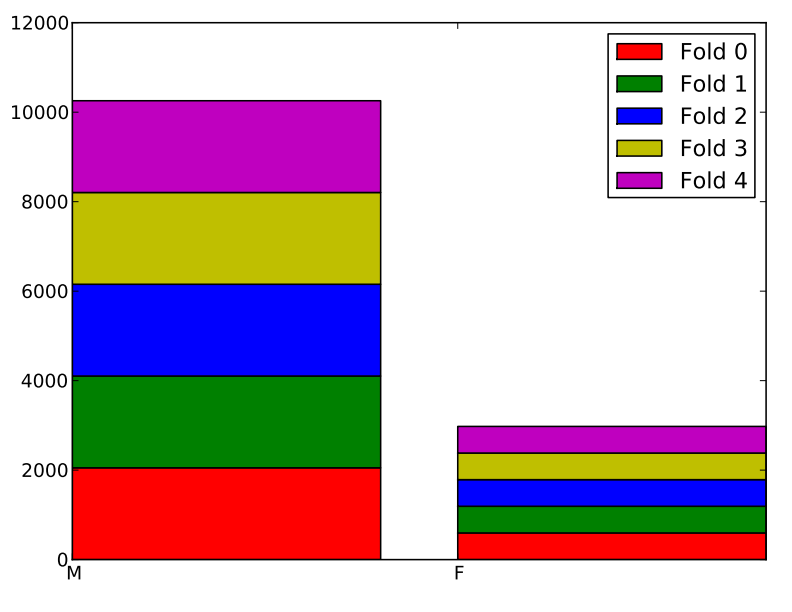

## Ethnicity Distribution 

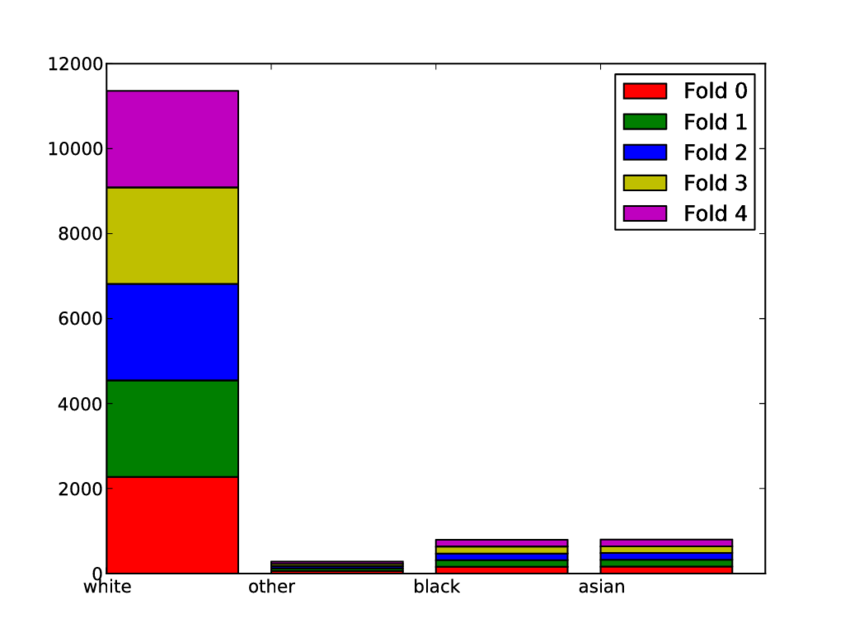

# UTKFace Dataset Insights

In [30]:
#Function to extract age from file name
def extract_age(file_name):
    return int(file_name.split('_')[0])

# Function to extract gender from file name
def extract_gender(file_name):
    return int(file_name.split('_')[1])

# Function to extract ethnicity from file name
def extract_ethnicity(file_name):
    return int(file_name.split('_')[2])

# Initiate a dict to hold gender, ethnicity, and age data
data = {'Gender': [], 'Ethnicity': [], 'Age': []}

# Loop over the three subfolders and append each subject's data to the data dict
for folder_name in ["part1", "part2", "part3"]:
    folder_path = os.path.join('UTKFace Dataset', folder_name)
    for root, _, files in os.walk(folder_path):
        for file in files:
            # Try to execute the functions as some files are not correctly format and raise an exception
            try:
                gender = extract_gender(file)
                ethnicity = extract_ethnicity(file)
                age = extract_age(file)
                data['Age'].append(age)
                data['Gender'].append(gender)
                data['Ethnicity'].append(ethnicity)
            except:
                break

df = pd.DataFrame(data)

## Gender Distribution

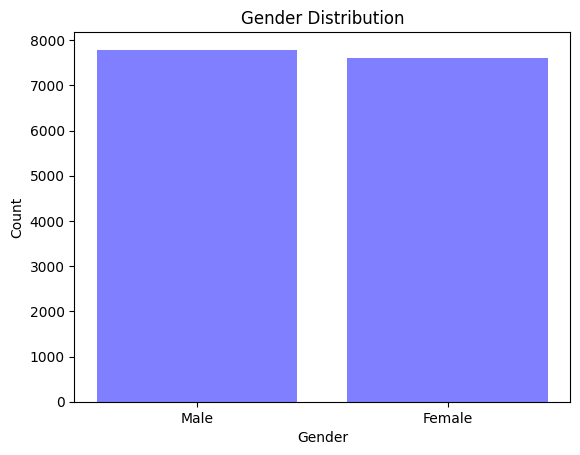

In [31]:
# Count the number of samples for each gender
gender_counts = df['Gender'].value_counts()
gender_labels = ['Male', 'Female']
# Create bar chart to visualize gender distribution
plt.bar(gender_labels, gender_counts, color=(0, 0, 1, 0.5))
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## Ethnicity Distribution

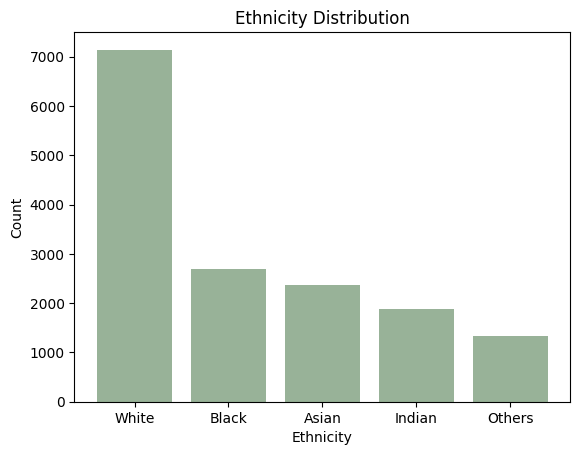

In [32]:

# Count the number of samples for each ethnicity
ethnicity_counts = df['Ethnicity'].value_counts()
ethnicity_labels = ['White', 'Black', 'Asian', 'Indian', 'Others']

# Create bar chart to visualize ethnicity distribution
plt.bar(ethnicity_labels, ethnicity_counts, color=(0.2, 0.4, 0.2, 0.5))
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()


## Age Distribution

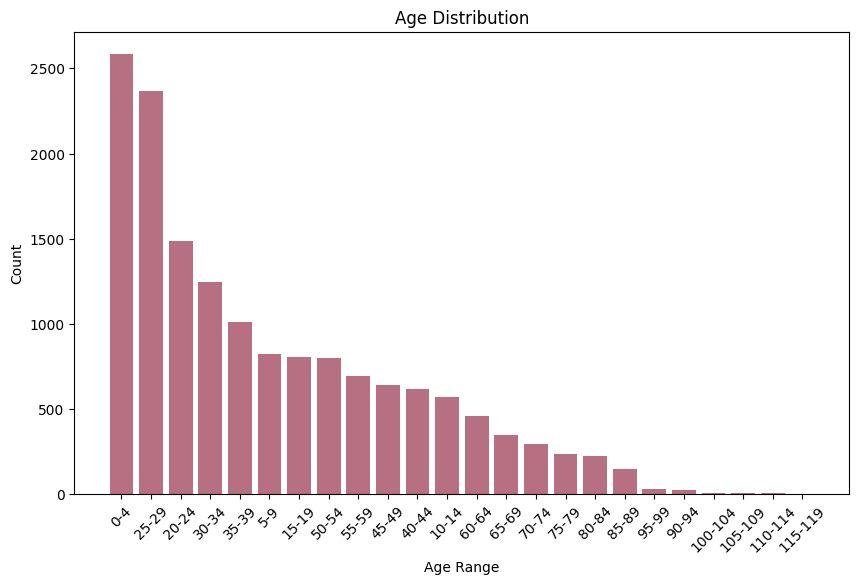

In [33]:
# Define age range bins in ranges of five
age_bins = list(range(0, 121, 5))

# Create age range labels
age_labels = [f"{start}-{start+4}" for start in age_bins[:-1]]

# Classify ages into age ranges
df['Age Range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Count the number of samples in each age range
age_range_counts = df['Age Range'].value_counts()

# Create a bar chart to visualize the age distribution
plt.figure(figsize=(10, 6))
plt.bar(age_range_counts.index, age_range_counts, color=(0.6, 0.2, 0.3, 0.7))
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## ORL Dataset Insights

## Samples
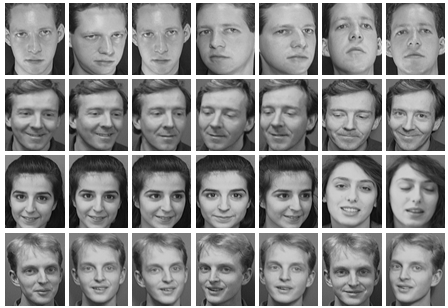